In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
class Particle():
    
    # Constructor
    def __init__(self, r0, v0, a, t):
        # atributo de clase
        self.t = t
        self.r = np.zeros( (len(t),2) )
        self.v = np.zeros( (len(t),2) )
        self.a = np.zeros( (1,2) )
        
        # Condiciones iniciales
        self.r[0] = r0
        self.v[0] = v0
        self.a[0] = a
       
    # Metodos de clase 
    def PrintR(self):
        print(self.r)
        
    def PrintV(self):
        print(self.v)
        
    def PrintA(self):
        print(self.a)
        
    def EvolucionTemporal(self):
        print('Evolucionando la particula')
        
        for i in range( 1, len(self.t) ):
            for j in range(2):
                self.v[i,j] = self.v[0,j] + self.a[0,j]*self.t[i]
                self.r[i,j] = self.r[0,j] + self.v[0,j]*self.t[i] + 0.5*self.a[0,j]*self.t[i]**2
         
    # Getters
    def GetR(self):
        return self.r
    def GetV(self):
        return self.v

In [10]:
# Discretizacion
t = np.linspace(0.,6.,50)
print(t)

[0.         0.12244898 0.24489796 0.36734694 0.48979592 0.6122449
 0.73469388 0.85714286 0.97959184 1.10204082 1.2244898  1.34693878
 1.46938776 1.59183673 1.71428571 1.83673469 1.95918367 2.08163265
 2.20408163 2.32653061 2.44897959 2.57142857 2.69387755 2.81632653
 2.93877551 3.06122449 3.18367347 3.30612245 3.42857143 3.55102041
 3.67346939 3.79591837 3.91836735 4.04081633 4.16326531 4.28571429
 4.40816327 4.53061224 4.65306122 4.7755102  4.89795918 5.02040816
 5.14285714 5.26530612 5.3877551  5.51020408 5.63265306 5.75510204
 5.87755102 6.        ]


In [11]:
r0 = np.array([0.,0.])
v, theta = 40., 40.*np.pi/180.
v0 = np.array([v*np.cos(theta),v*np.sin(theta)])
a = np.array([0.,-9.8])

In [12]:
# Nuestro primer objeto
p1 = Particle(r0,v0,a,t)
p1.EvolucionTemporal()

Evolucionando la particula


In [13]:
x = p1.GetR()[:,0]
y = p1.GetR()[:,1]

In [14]:
Dictp = {}

angles = [10,20,30,40,50,60,70,80,90]

for i in range(len(angles)):
    
    theta = angles[i]*np.pi/180.
    v0 = np.array([v*np.cos(theta),v*np.sin(theta)])
    
    p = Particle(r0,v0,a,t)
    p.EvolucionTemporal()
    
    Dictp[i] = p.GetR()

Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula
Evolucionando la particula


<IPython.core.display.Javascript object>


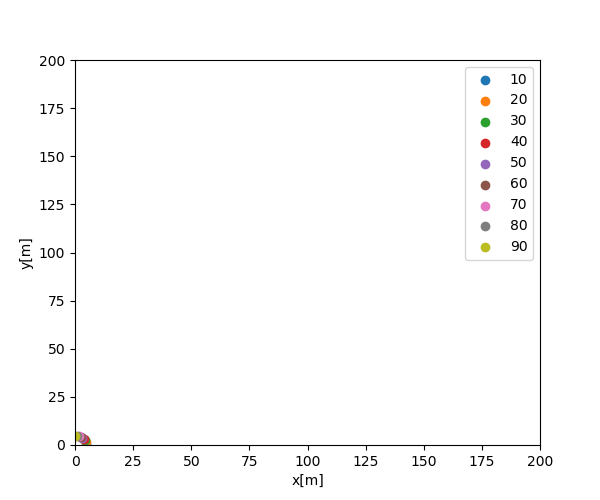

In [15]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    ax.set_xlim(0.,200)
    ax.set_ylim(0.,200)
    
def Update(i):
    plot = ax.clear()
    init()
    
    for p in range(len(Dictp)):
        plot = ax.scatter( Dictp[p][i,0], Dictp[p][i,1], marker = 'o', label=str(angles[p]) )
        plot = ax.legend(loc=1)
    
    #plot = ax.scatter(x[i],y[i],marker='o')
    
Animation = anim.FuncAnimation(fig, Update, frames=len(t), init_func=init) 

In [ ]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('Parabolico.mp4', writer=writer_)